<a href="https://colab.research.google.com/github/jungeun919/Deep_learning/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step

Epoch 00001: val_loss improved from inf to 0.05466, saving model to ./model/01-0.0547.hdf5

Epoch 00002: val_loss improved from 0.05466 to 0.03968, saving model to ./model/02-0.0397.hdf5

Epoch 00003: val_loss improved from 0.03968 to 0.03493, saving model to ./model/03-0.0349.hdf5

Epoch 00004: val_loss did not improve from 0.03493

Epoch 00005: val_loss improved from 0.03493 to 0.03082, saving model to ./model/05-0.0308.hdf5

Epoch 00006: val_loss improved from 0.03082 to 0.03019, saving model to ./model/06-0.0302.hdf5

Epoch 00007: val_loss did not improve from 0.03019

Epoch 00008: val_loss did not improve from 0.03019

Epoch 00009: val_loss improved from 0.03019 to 0.02981, saving model to ./model/09-0.0298.hdf5

Epoch 00010: val_loss improved from 0.02981 to 0.02918, saving model to ./model/10-0.0292.hdf5

Epoch 00011: val_loss improved from 0.02918 to 0.02893, saving model to ./model/11-0.0289.hdf5

Epoch 00012: v

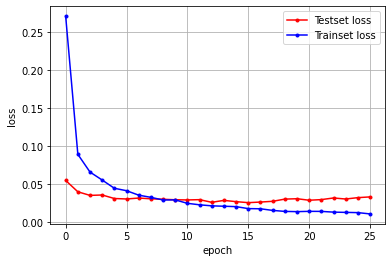

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망(CNN) 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습의 자동 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트의 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()